In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


In [ ]:
df = pd.read_csv('/kaggle/input/crop-yield-prediction-dataset/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


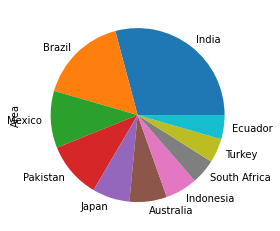

In [ ]:
import matplotlib.pyplot as plt
df['Area'].value_counts()[:10].plot(kind='pie')
plt.show()

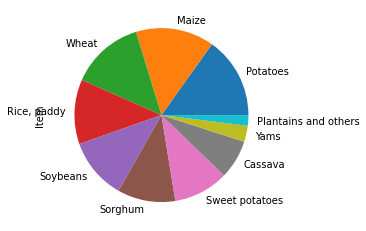

In [ ]:
df['Item'].value_counts()[:10].plot(kind='pie')
plt.show()

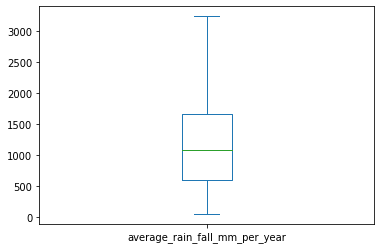

In [ ]:
df['average_rain_fall_mm_per_year'].plot(kind='box')
plt.show()

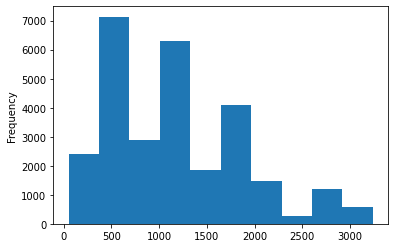

In [ ]:
df['average_rain_fall_mm_per_year'].plot(kind='hist')
plt.show()

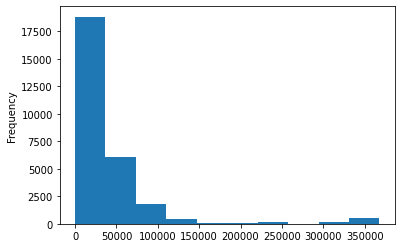

In [ ]:
df['pesticides_tonnes'].plot(kind='hist')
plt.show()

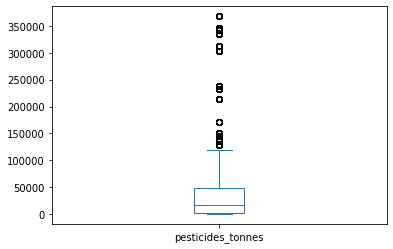

In [ ]:
df['pesticides_tonnes'].plot(kind='box')
plt.show()

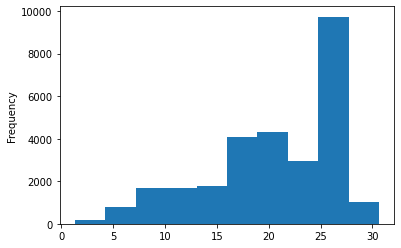

In [ ]:
df['avg_temp'].plot(kind='hist')
plt.show()

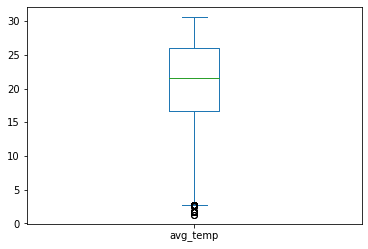

In [ ]:
df['avg_temp'].plot(kind='box')
plt.show()

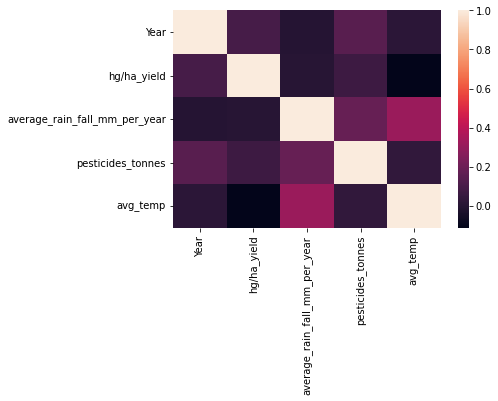

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

In [ ]:
df_ohe = pd.get_dummies(df, columns=['Area',"Item"])

In [ ]:
df_ohe.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.0,16.37,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp']
df_ohe[cols]= sc.fit_transform(df_ohe[cols])
df_ohe.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.637075,36613,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,66667,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,23333,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,12500,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,7000,0.473294,-0.616366,-0.661069,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
y = df_ohe['hg/ha_yield']
X= df_ohe.drop('hg/ha_yield',axis=1)
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.637075,0.473294,-0.616366,-0.661069,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train , y_train)
y_pred = dt.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.9781521528994254

In [ ]:
sv = SVR()
sv.fit(x_train , y_train)
y_pred = sv.predict(x_test)
score = r2_score(y_test,y_pred)
score

-0.20210085081817764

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=300, max_depth=5, random_state=0)
gbr.fit(x_train , y_train)
y_pred = gbr.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.9635782905032044

In [ ]:
rf =RandomForestRegressor(n_estimators=300, max_depth=5, random_state=0)
rf.fit(x_train , y_train)
y_pred = rf.predict(x_test)
score = r2_score(y_test,y_pred)
score

0.8170027476313629